<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review.

The grading will center around 5 main points:

1. Does the report include a section describing the data?
2. Does the report include a paragraph detailing the main objective(s) of this analysis?
3. Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4. Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5. Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques?




## Import the required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox
from scipy.stats import normaltest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_predict


## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [25]:
data = pd.read_csv('/content/drive/MyDrive/OLX_cars_dataset00.csv')
data.head()

,Ad ID,Car Name,Make,Model,Year,KM's driven,Price,Fuel,Registration city,Car documents,Assembly,Transmission,Condition,Seller Location,Description,Car Features,Images URL's,Car Profile
0,1079071571,fresh import Passo 2021model,Toyota,Passo,2021,54000,4190000,Petrol,Unregistered,Original,Imported,Automatic,Used,"Airline Avenue, Islamabad","it's 2021 model fresh import, perfect engine s...","ABS, Air Bags, AM/FM Radio, CD Player, Cassett...",['https://images.olx.com.pk/thumbnails/4039460...,https://www.olx.com.pk/item/fresh-import-passo...
1,1080125520,Suzuki ravi,Suzuki,Ravi,2018,95000,1300000,Petrol,Karachi,Original,Local,Manual,Used,"Kahuta, Rawalpindi",Suzuki ravi 2018 col,AM/FM Radio,['https://images.olx.com.pk/thumbnails/4102504...,https://www.olx.com.pk/item/suzuki-ravi-iid-10...
2,1080748789,Suzuki bolan 2015 contact 03112271054,Suzuki,Bolan,2015,50000,800000,Petrol,Karachi,Original,Local,Manual,Used,"Lyari Expressway, Karachi",Suzuki bolan model 2015 reg 2022 ghadi me koi ...,Rear speakers,['https://images.olx.com.pk/thumbnails/4139520...,https://www.olx.com.pk/item/suzuki-bolan-2015-...
3,1076081635,Diahatsu Move 2013,Daihatsu,Move,2013,94000,2155000,Petrol,Lahore,Original,Imported,Automatic,Used,"New Amir Town, Lahore",Move Push start \nHome Used car. \nModel 2013....,"ABS, Air Bags, Air Conditioning, Alloy Rims, A...",['https://images.olx.com.pk/thumbnails/3865337...,https://www.olx.com.pk/item/diahatsu-move-2013...
4,1080812928,Suzuki Swift DLX 2011 miner tuchap,Suzuki,Swift,2011,126544,1440000,Petrol,Karachi,Original,Local,Manual,Used,"Shadman 2, Karachi",Suzuki Swift DLX\nAbS Break 100%\nengine 100%\...,"ABS, Air Conditioning, Alloy Rims, AM/FM Radio...",['https://images.olx.com.pk/thumbnails/4143509...,https://www.olx.com.pk/item/suzuki-swift-dlx-2...


Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
*   Brief description of the data set you chose and a summary of its attributes.
*   Brief summary of data exploration and actions taken for data cleaning and feature engineering.
*   Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
*  A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
*  Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
*  Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


# 1. About the Data


## This dataset is from the ecommerce website olx and it contains mostly  cars mostly used in Pakistan, captures real data without any dummy entries. Dataset contains car details of 11 famous companies e.g., Suzuki, Toyota, Honda, Hyundai, Daihatsu and Mercedes etc. Further, company models are also mentioned such as Suzuki company models are Bolan, Alto, Wagon R, Swift, Baleno etc.

In [26]:
data.describe()

,Ad ID,Year,KM's driven,Price
count,9.179000e+03,9179.000000,9179.000000,9.179000e+03
mean,1.079720e+09,2012.268984,96570.420525,2.036814e+06
std,2.848393e+06,6.043902,61983.250088,1.159302e+06
min,1.019824e+09,1989.000000,1.000000,1.850000e+05
25%,1.080003e+09,2007.000000,53000.000000,1.025000e+06
50%,1.080543e+09,2013.000000,92000.000000,1.820000e+06
75%,1.080773e+09,2017.000000,125000.000000,2.750000e+06
max,1.080975e+09,2024.000000,533528.000000,5.000000e+06


In [27]:
data.shape

(9179, 18)

# 2. Objectives


## The main objective of this analysis was to predict the price target and see the relationship each features plays in the prediction of the data price data

## I plan to perform data cleaning to find missing datas and outliers as well as explanatory data analysis on the features to see their correlation

In [28]:
data.isnull().sum().any()

True

In [29]:
data.drop("Images URL's"	,axis=1, inplace=True)

In [30]:
data.drop(['Ad ID','Car Name','Registration city','Seller Location',	'Description','Car Features',		'Car Profile'], axis= 1, inplace=True)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9179 entries, 0 to 9178
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           9179 non-null   object
 1   Model          9179 non-null   object
 2   Year           9179 non-null   int64 
 3   KM's driven    9179 non-null   int64 
 4   Price          9179 non-null   int64 
 5   Fuel           9179 non-null   object
 6   Car documents  9179 non-null   object
 7   Assembly       9179 non-null   object
 8   Transmission   9179 non-null   object
 9   Condition      9179 non-null   object
dtypes: int64(3), object(7)
memory usage: 717.2+ KB


In [32]:
data.head()

,Make,Model,Year,KM's driven,Price,Fuel,Car documents,Assembly,Transmission,Condition
0,Toyota,Passo,2021,54000,4190000,Petrol,Original,Imported,Automatic,Used
1,Suzuki,Ravi,2018,95000,1300000,Petrol,Original,Local,Manual,Used
2,Suzuki,Bolan,2015,50000,800000,Petrol,Original,Local,Manual,Used
3,Daihatsu,Move,2013,94000,2155000,Petrol,Original,Imported,Automatic,Used
4,Suzuki,Swift,2011,126544,1440000,Petrol,Original,Local,Manual,Used


In [33]:
num_data= data.select_dtypes(include = ['int'])
obj_data= data.select_dtypes(include = ['object']).columns.tolist()

In [ ]:
data['Make'].unique()

array(['Toyota', 'Suzuki', 'Daihatsu', 'Honda', 'Hyundai', 'Mitsubishi',
       'KIA', 'Changan', 'FAW', 'Mercedes', 'Chevrolet'], dtype=object)

In [37]:
data= pd.get_dummies(data)

<Axes: >

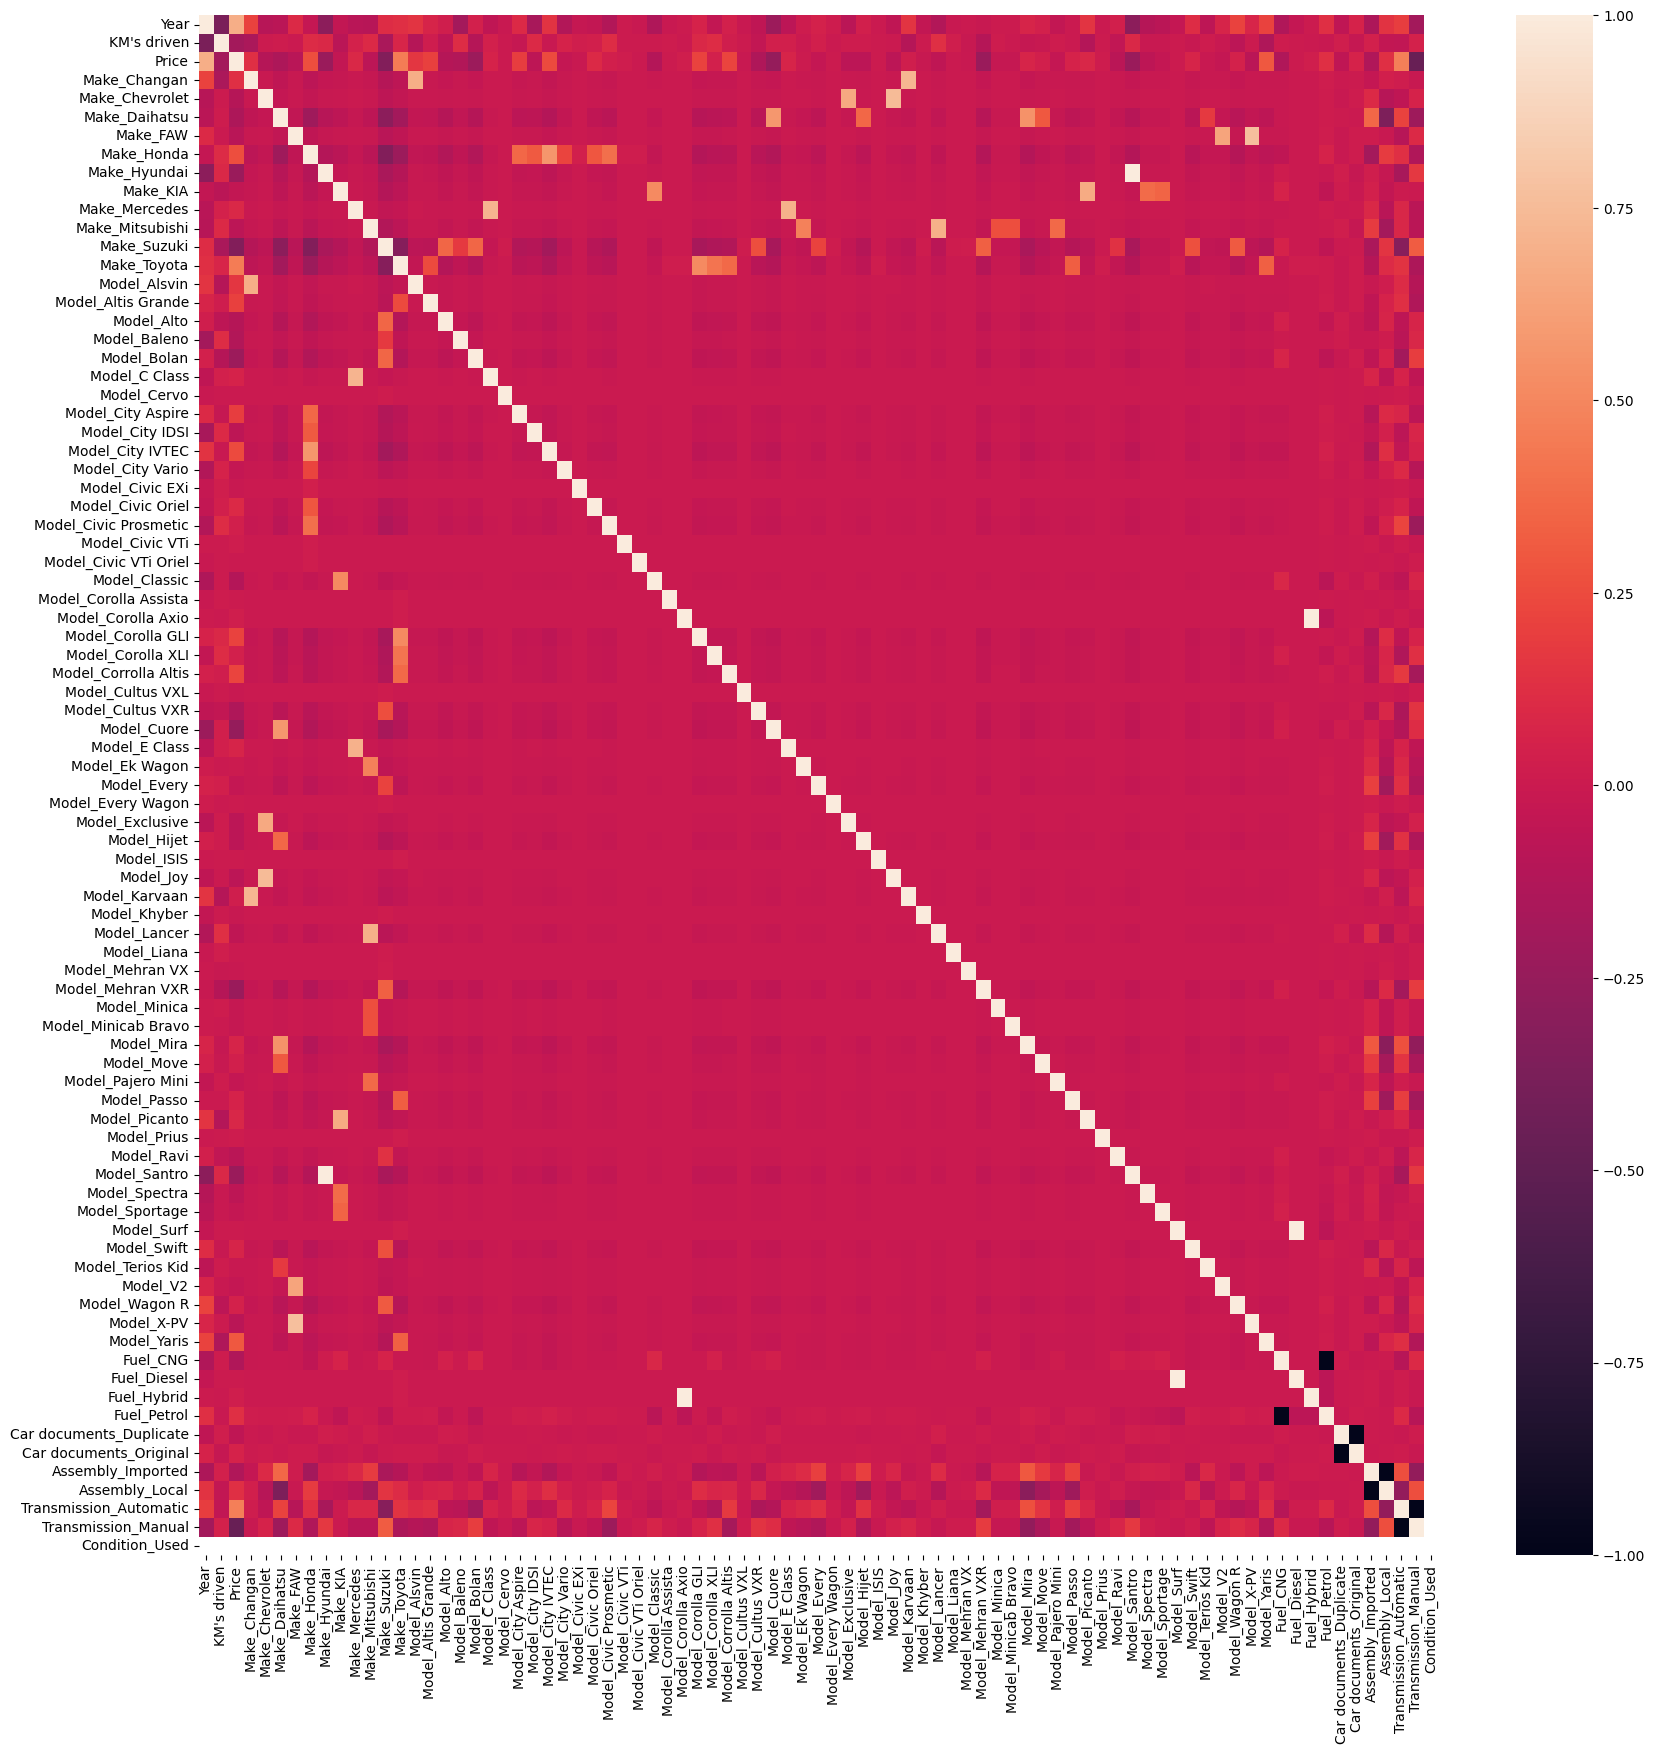

In [40]:
data.corr().sort_values()

# 3. Linear Regression Models


<ipython-input-43-049e7ab17fe1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Price'])


<Axes: xlabel='Price', ylabel='Density'>

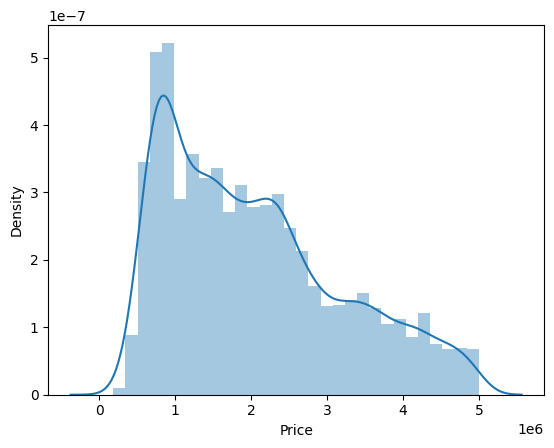

In [43]:
sns.distplot(data['Price'])

In [44]:
pb = boxcox(data['Price'])
data['Price'] = pb[0]

In [45]:
X= data.drop('Price',axis=1)
y = data['Price']

In [57]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [58]:
lr= LinearRegression()

In [59]:
lr.fit(x_train,y_train)
yhat = lr.predict(x_test)
print(f'train: { lr.score(x_train,y_train)}')
print(f'test:  {lr.score(x_test,y_test)}')

train: 0.9379458885584937
test:  0.9303093884529696


In [69]:
lrm= pd.DataFrame(zip(X.columns,lr.coef_)).sort_values(by=1)
lrm

,0,1
50,Model_Mehran VX,-6.777785
5,Make_FAW,-6.597876
60,Model_Ravi,-6.307993
29,Model_Classic,-6.191600
69,Model_X-PV,-6.130681
...,...,...
65,Model_Swift,5.349951
63,Model_Sportage,5.374212
12,Make_Toyota,5.622872
38,Model_E Class,7.491126


<ipython-input-60-21a14cb884cb>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
<ipython-input-60-21a14cb884cb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


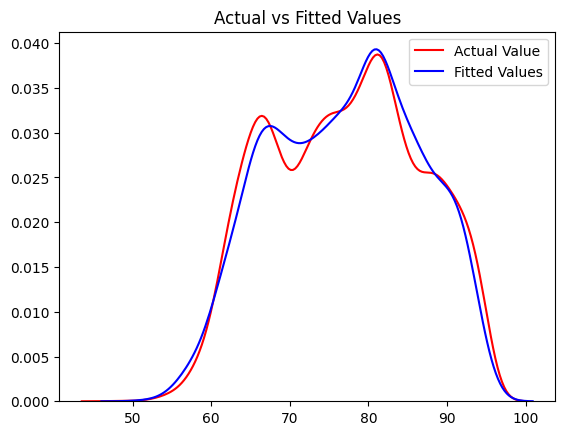

In [60]:

    plt.figure()
    ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
    sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)
    plt.legend()

    plt.title('Actual vs Fitted Values')
    plt.xlabel('')
    plt.ylabel('')

    plt.show()
    plt.close()

In [61]:
est = Pipeline([('poly',PolynomialFeatures(include_bias=False,degree=2)),('Scale',StandardScaler()),('model',Ridge(alpha=0.1))])


In [62]:
est.fit(x_train,y_train)
rpred = est.predict(x_test)
print(f'train{est.score(x_train,y_train)}')
print(f'test {est.score(x_test,y_test)}')

train0.9467436260267023
test 0.9227807156177997


<ipython-input-63-310a30cdebe3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
<ipython-input-63-310a30cdebe3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rpred, hist=False, color="b", label="Fitted Values" , ax=ax1)


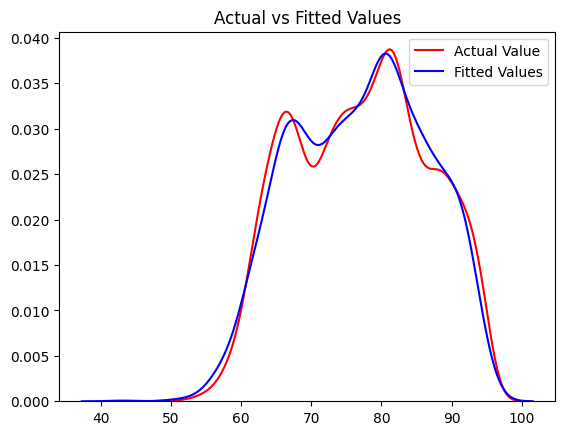

In [63]:

    plt.figure()
    ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
    sns.distplot(rpred, hist=False, color="b", label="Fitted Values" , ax=ax1)
    plt.legend()

    plt.title('Actual vs Fitted Values')
    plt.xlabel('')
    plt.ylabel('')

    plt.show()
    plt.close()

In [64]:
estl = Pipeline([('poly',PolynomialFeatures(include_bias=False,degree=2)),('Scale',StandardScaler()),('model',Lasso(alpha=0.1))])
estl.fit(x_train,y_train)
lpred = estl.predict(x_test)
print(f'train{estl.score(x_train,y_train)}')
print(f'test {estl.score(x_test,y_test)}')


train0.9372541494199309
test 0.9292055142934694


<ipython-input-65-54c717e65c0b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
<ipython-input-65-54c717e65c0b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lpred, hist=False, color="b", label="Fitted Values" , ax=ax1)


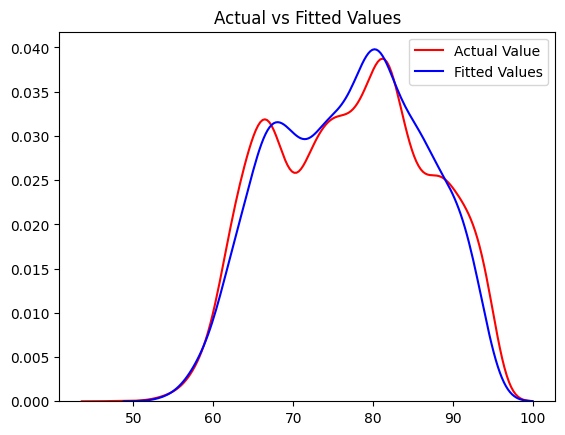

In [65]:

    plt.figure()
    ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
    sns.distplot(lpred, hist=False, color="b", label="Fitted Values" , ax=ax1)
    plt.legend()

    plt.title('Actual vs Fitted Values')
    plt.xlabel('')
    plt.ylabel('')

    plt.show()
    plt.close()

In [67]:
este = Pipeline([('poly',PolynomialFeatures(include_bias=False,degree=2)),('Scale',StandardScaler()),('model',ElasticNet(alpha=0.1,l1_ratio=0.5))])
este.fit(x_train,y_train)
epred = este.predict(x_test)
print(f'train{este.score(x_train,y_train)}')
print(f'test {este.score(x_test,y_test)}')



train0.9410795162606872
test 0.9326507885412925


<ipython-input-68-310a30cdebe3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
<ipython-input-68-310a30cdebe3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rpred, hist=False, color="b", label="Fitted Values" , ax=ax1)


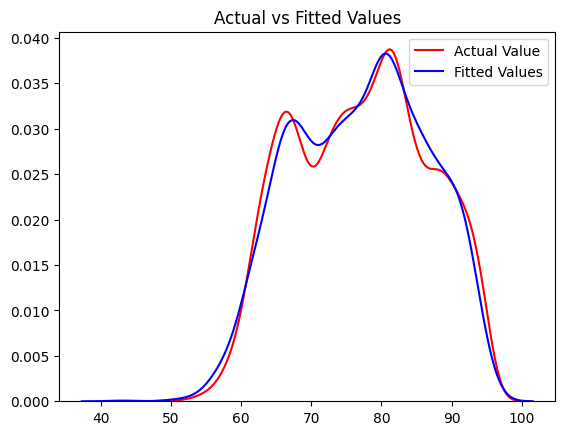

In [68]:

    plt.figure()
    ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
    sns.distplot(rpred, hist=False, color="b", label="Fitted Values" , ax=ax1)
    plt.legend()

    plt.title('Actual vs Fitted Values')
    plt.xlabel('')
    plt.ylabel('')

    plt.show()
    plt.close()

In [74]:
mse_linear_reg = mean_squared_error(y_test, yhat)
mse_lasso = mean_squared_error(y_test, lpred)
mse_ridge = mean_squared_error(y_test,rpred)
mse_elastic = mean_squared_error(y_test, epred)

print(f'MSE for Linear Regression: {mse_linear_reg}')
print(f'MSE for lasso: {mse_lasso}')
print(f'MSE for Ridge: {mse_ridge}')
print(f'MSE for ElasticNet: {mse_elastic}')


MSE for Linear Regression: 6.333493235168853
MSE for lasso: 6.120706443791525
MSE for Ridge: 7.0177001521819
MSE for ElasticNet: 6.120706443791525


#I have decide to use Lasso as my model because it has the least MSE

# 4. Insights and key findings


## I found out that brand are a high determining factor when it comes to the prediction of car price as mercedes cars have a higher selling price and the inverse is the case for FAW.

# 5. Next Steps


## I belive that the features of this dataset is limited and more features are needed to provide a more accurate prediction. I also belive that compute power would be necessary

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
